In [1]:
#Import required packages
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input


In [2]:
#Import opencv libraray
import cv2

In [5]:
#Reading all the closed and open images
import os
classes=['closed_eyes','open_eyes']
def create_training_Data():
    for category in classes:
        path = os.path.join('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01',category)
        class_num=classes.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
            new_array = cv2.resize(backtorgb,(224,224))
            training_data.append([new_array,class_num])

In [6]:
training_data=[]
create_training_Data()

1


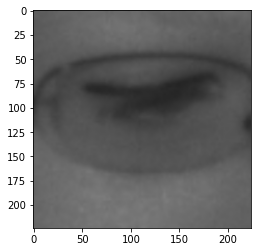

In [7]:
#Randomly printing one image
plt.imshow(training_data[-1][0])
print(training_data[-1][1])

In [8]:
#Shuffling the data
import random
random.shuffle(training_data)

0


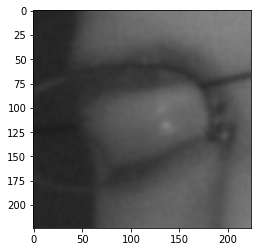

In [9]:
plt.imshow(training_data[-1][0])
print(training_data[-1][1])

In [10]:
#Total available data
len(training_data)

41924

In [11]:
# Converting data into numpy array and also resizing.
X=[]
y=[]

for image,label in training_data:
    X.append(image)
    y.append(label)
    
X = np.array(X).reshape(-1,224,224,3)
y= np.array(y)

In [12]:
# X=X/255.0

MemoryError: Unable to allocate 47.0 GiB for an array with shape (41924, 224, 224, 3) and data type float64

# CNN

In [13]:
#Importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import mobilenet

In [14]:
# Downloading mobilenet model as basemodel for transfer learning
model = mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [15]:
headModel = model.layers[-4].output # output of MobileNet model
headModel = Flatten(name="flatten")(headModel)  # Flatten layer
headModel = Dense(32, activation="relu")(headModel)  # First hidden layer
headModel = Dense(1, activation="sigmoid")(headModel)  # Output layer

#Making basemodel layers untrainable
for layer in model.layers:
    layer.trainable = False

model_mobilenet = Model(inputs=model.layers[0].input, outputs=headModel) #Final Model
model_mobilenet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [16]:
#Compiling the model
model_mobilenet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#Training the model with 20% validation split
H = model_mobilenet.fit(X,y,epochs=40,validation_split=0.2)

Train on 33539 samples, validate on 8385 samples
Epoch 1/40
33539/33539 [==============================] - 754s 22ms/sample - loss: 0.0806 - accuracy: 0.9708 - val_loss: 0.7698 - val_accuracy: 0.4026
Epoch 2/40
33539/33539 [==============================] - 739s 22ms/sample - loss: 0.0426 - accuracy: 0.9845 - val_loss: 1.5530 - val_accuracy: 0.4837
Epoch 3/40
33539/33539 [==============================] - 739s 22ms/sample - loss: 0.0361 - accuracy: 0.9869 - val_loss: 2.7497 - val_accuracy: 0.4905
Epoch 4/40
33539/33539 [==============================] - 739s 22ms/sample - loss: 0.0325 - accuracy: 0.9886 - val_loss: 2.0997 - val_accuracy: 0.4902
Epoch 5/40
33539/33539 [==============================] - 738s 22ms/sample - loss: 0.0273 - accuracy: 0.9905 - val_loss: 1.4373 - val_accuracy: 0.4801
Epoch 6/40
33539/33539 [==============================] - 740s 22ms/sample - loss: 0.0249 - accuracy: 0.9911 - val_loss: 1.8887 - val_accuracy: 0.4899
Epoch 7/40
33539/33539 [=====================

In [18]:
#Saving the model
model_mobilenet.save('drowsiness_model3_valacc56_trainacc99.h5')

[INFO] Training curve with loss and accuracy********


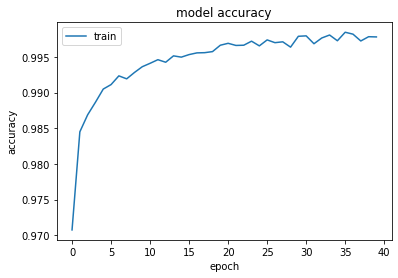

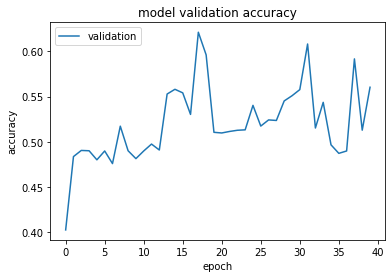

In [20]:
 print("[INFO] Training curve with loss and accuracy********")
#  "Training Accuracy"
plt.plot(H.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# "Validation Accuracy"
plt.plot(H.history['val_accuracy'])
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'], loc='upper left')
plt.show()

# Prediction

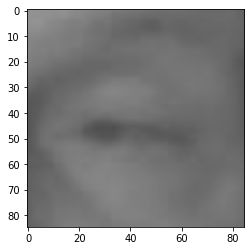

In [22]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00025_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [23]:
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.52477986]], dtype=float32)

In [24]:
new_input_array.shape

(1, 224, 224, 3)

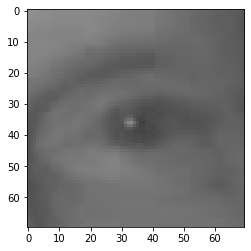

In [25]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0023_00300_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [26]:
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.9999819]], dtype=float32)

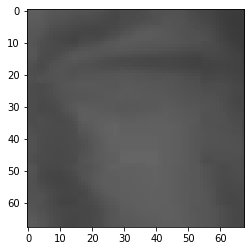

In [27]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('s0028_00007_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [28]:
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.42090145]], dtype=float32)

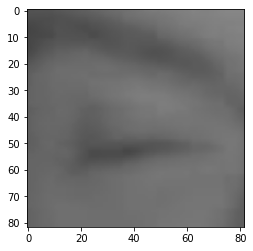

In [29]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00009_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)

In [30]:
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.47918913]], dtype=float32)

array([[0.5529267]], dtype=float32)

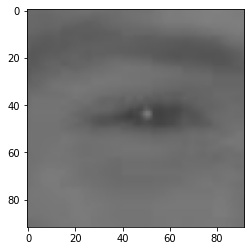

In [32]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00017_0_0_0_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.9999993]], dtype=float32)

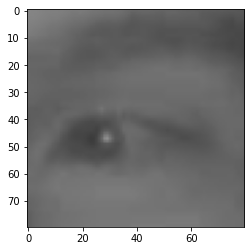

In [33]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00160_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model_mobilenet.predict(new_image)
prediction

array([[0.72592115]], dtype=float32)

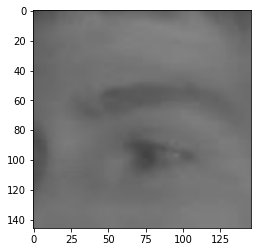

In [34]:
# input_img = cv2.imread('G:\Mtec_Final_year_project_research paper\datasets\mrlEyes_2018_01\open_eyes\s0003_00679_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread('C:/Users/Dell/Downloads/project/test_images/s0033_00184_0_0_1_0_1_01.png', cv2.IMREAD_GRAYSCALE)
# img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
input_image_backtorgb = cv2.cvtColor(input_img,cv2.COLOR_GRAY2RGB)
new_input_array = cv2.resize(input_image_backtorgb,(224,224))
new_input_array = np.array(new_input_array).reshape(-1,224,224,3)
new_image = new_input_array/255.0
plt.imshow(input_image_backtorgb)
prediction = model_mobilenet.predict(new_image)
prediction